<h1>Final Project</h1>

Full name: Bùi Thị Dung

Student ID: 20127472

### Link github [here](https://github.com/bdung/FinalProjectLTKHDL.git) 

<h3> Programming environment</h3>

In [21]:
import sys
sys.executable

'e:\\anaconda\\envs\\min_ds-env\\python.exe'

<h3>Import necessary libraries</h3>

In [36]:
import pandas as pd
import numpy as np
import re
import operator
from collections import Counter
import matplotlib.pyplot as plt

## 1. Collecting data

<h3> Data collection</h3>

In this assigment, I will use data in file "data.csv".
The data is about product listing from Amazon India. You can find more detail about data in Kaggle [this link](https://www.kaggle.com/datasets/promptcloud/product-listing-from-amazon-india?fbclid=IwAR35mYSniLTkn1ZedNxc_m9UNbuIksUAjAfpTRp9ystlxaZZVOMZIkFNKiI).

<p><b>Author: </b> PromptCloud and DataStock.</p>
<p><b>License: </b> CC0: Public Domain.</p>
<p><b>How to collect author data: </b>  parse HTML of website and save to csv file</p>

## 2. Exploring data

### Data exploration

<h4>Store data to a dataframe

In [23]:
data_df = pd.read_csv('data.csv')
data_df.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.00,799.00,Amazon In,60.05%,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.00,2040.00,Amazon In,0%,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.00,1042.00,Amazon In,42.87%,NaN,YES,B07DCSN8MP,https://images-na.ssl-images-amazon.com/images...
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.00,1399.00,Amazon In,35.97%,NaN,YES,B07GLW9VQN,https://images-na.ssl-images-amazon.com/images...
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594.00,570.00,Amazon In,4.04%,NaN,YES,B07NFYYLF1,https://images-na.ssl-images-amazon.com/images...


### How many rows and how many columns?


Use pandas to find the number of rows and columns and store in 2 variables `num_rows` and `num_cols`.

In [24]:
num_rows = len(data_df)
num_cols = len(data_df.columns)
num_rows, num_cols

(30000, 15)

### What is the meaning of each row?

According to data description of the product and by taking a quick look at the data, each line provides information about a case. It seems that there is no outlier line.

###  Are there duplicated rows?

You are going to check that and save the result into `have_duplicated_rows`. The value of this variable is `True` if the data is duplicated and vice versa.

In [25]:
have_duplicated_rows = any(data_df.duplicated())
if have_duplicated_rows:
    print('Duplicated')
else :
    print ('Not duplicated')

Not duplicated


### What is the meaning of row?

According to the data description of the course about the file "data.csv":
- **Uniq Id**:  unique identifier for each observation (random)
- **Crawl Timestamp**: Time to collect information
- **Category**: category product
- **Product Title**: Product title
- **Product Description**: Product Description
- **Brand**: Brand of the product
- **Pack Size Or Quantity**:Size of package or quality of product
- **Mrp**:Maximum retail price
- **Price**: actual selling price
- **Site Name**: Websites that sell products
- **Offers**: Sale
- **Combo Offers**: Combo offers provided by sellers.
- **Stock Availibility**: In stock (If in stock, then YES, out of stock, NO).
- **Product Asin**: ASIN (Amazon Standard Identification Number)is the product code marked by Amazon. Each code consists of 10 characters with letters and numbers
- **Image Urls**: Link picture product

### What is the current data type of each column? Are there columns having inappropriate data types?

Check the datatype (`dtype`) of each element in a column in `data_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [26]:
col_dtypes = data_df.dtypes
col_dtypes

Uniq Id                  object
Crawl Timestamp          object
Category                 object
Product Title            object
Product Description      object
Brand                    object
Pack Size Or Quantity    object
Mrp                      object
Price                    object
Site Name                object
Offers                   object
Combo Offers             object
Stock Availibility       object
Product Asin             object
Image Urls               object
dtype: object

**What does that mean by saying that `dtype` is `object`?**

There are 15 columns with the datatype of `object`: "Uniq Id", "Crawl Timestamp", "Category", "Product Title","Product Description", "Brand", "Pack Size Or Quantity", "Mrp", "Price", "Site Name", "Offers", "Combo Offers", "Stock Availibility", "Product Asin", "Product Description", "Image Urls". In Pandas, `object` types usually refer to strings. But in fact, an element of `object` type can contain any object in Python as they store the addresses of variables. If the datatype of a column in dataframe is `object`, the datatype of elements in that column can be different from each other. In order to specify the datatype of elements in column, you have to access each of them (e.g. `type(column.iloc[i])`). 
Your work is to write a function that has the series as input and the datatypes of elements in column as output. You can use the `apply` method.

In [27]:
def open_object_dtype(s):
    dtypes = set()
    s.agg(lambda x : dtypes.add(type(x)))
    
    return dtypes

print('Uniq Id',open_object_dtype(data_df['Uniq Id']))
print('Crawl Timestamp',open_object_dtype(data_df['Crawl Timestamp']))
print('Category',open_object_dtype(data_df['Category']))
print('Product Title',open_object_dtype(data_df['Product Title']))
print('Product Description',open_object_dtype(data_df['Product Description']))
print('Brand',open_object_dtype(data_df['Brand']))
print('Pack Size Or Quantity',open_object_dtype(data_df['Pack Size Or Quantity']))
print('Mrp',open_object_dtype(data_df['Mrp']))
print('Price',open_object_dtype(data_df['Price']))
print('Site Name',open_object_dtype(data_df['Site Name']))
print('Offers',open_object_dtype(data_df['Offers']))
print('Combo Offers',open_object_dtype(data_df['Combo Offers']))
print('Stock Availibility',open_object_dtype(data_df['Stock Availibility']))
print('Product Asin',open_object_dtype(data_df['Product Asin']))
print('Image Urls',open_object_dtype(data_df['Image Urls']))


Uniq Id {<class 'str'>}
Crawl Timestamp {<class 'str'>}
Category {<class 'str'>}
Product Title {<class 'str'>}
Product Description {<class 'str'>, <class 'float'>}
Brand {<class 'str'>, <class 'float'>}
Pack Size Or Quantity {<class 'str'>, <class 'float'>}
Mrp {<class 'str'>, <class 'float'>}
Price {<class 'str'>, <class 'float'>}
Site Name {<class 'str'>}
Offers {<class 'str'>, <class 'float'>}
Combo Offers {<class 'str'>, <class 'float'>}
Stock Availibility {<class 'str'>}
Product Asin {<class 'str'>}
Image Urls {<class 'str'>}


#### Before continuing
- The datatype of column "Crawl Timestamp" is `str`. In order for you to explore more about the data, you have to change the datatype to `datetime`.
- Column "Mrp", "Offers ,"Price" and "Pack Size Or Quantity" contain `str` and `float` data. You also have to change the datatype to `float`.

## Proprocess


### Change the dtype of "Crawl Timestamp" to `datetime `

In [28]:
data_df["Crawl Timestamp"] = pd.to_datetime(data_df["Crawl Timestamp"] ,format= "%Y-%m-%d %H:%M:%S")
data_df["Crawl Timestamp"]

0       2019-10-30 11:38:11+00:00
1       2019-10-31 15:46:54+00:00
2       2019-10-30 09:53:23+00:00
3       2019-10-29 16:16:52+00:00
4       2019-10-31 09:32:06+00:00
                   ...           
29995   2019-10-31 06:29:39+00:00
29996   2019-10-30 04:10:36+00:00
29997   2019-10-30 22:54:39+00:00
29998   2019-10-31 08:20:12+00:00
29999   2019-10-30 07:54:05+00:00
Name: Crawl Timestamp, Length: 30000, dtype: datetime64[ns, UTC]

### Change the dtype of "Mrp" and "Price" to `float `

- Column `Mrp` have 2 dtypes is `str`  and `float`.`float` is for NaN, and `str` is for string (numeric).
- Check the `Mrp` column, we see that it contains 1 character '.' at in string . For example 594.00, this makes it very difficult to convert data from string to float. To handle this we use the `lstrip` function to remove the '.' in strings.
- There are some empty columns of data, so we will convert the values ​​of these empty columns to NaN.
- Similar to 'Mrp', the 'Price' column is also handled as above.

In [29]:
#Mrp
# replace columns space to NaN
data_df['Mrp'] = data_df['Mrp'].replace(r'^\s*$', np.nan, regex=True)
# Remove '.' in string
data_df["Mrp"] = data_df["Mrp"].str.lstrip('.')
# Change data types
data_df['Mrp'] = data_df['Mrp'].astype(float)

#Price
# replace columns space to NaN
data_df['Price'] = data_df['Price'].replace(r'^\s*$', np.nan, regex=True)
# Remove '.' in string
data_df["Price"] = data_df["Price"].str.lstrip('.')
# Change data types
data_df['Price'] = data_df['Price'].astype(float)

### Change the dtype of "Offers" to `float `

Column "Offers"  have 2 dtypes is `str`  and `float`.`float` is for NaN and `str` is for string with '%' character after it.
. So we do the cast for the data cells as NaN from float to string, then cut off the % behind.

In [30]:
data_df["Offers"]= data_df["Offers"].str.replace('%','')
data_df["Offers"] = data_df['Offers'].astype(float)


### Change the dtype of `Pack Size Or Quantity` to `float`

- The column `Pack Size Or Quantity` has dtypes of two types, `str` and `float`. `float` is for NaN, and `str` is for string(product weight)
- We use the apply method to cut off the mass unit (g/gram/kilogram/Kg) of the string and convert the string from `str` to `float`. If the original sequence is waiting for the mass unit to be Kg/kilogram, then multiply by 1000 .

In [31]:
def change_unit(x):
    if(type(x) == str):
        try:
            num = float(re.findall('\d+', x)[0])
        except:
            return np.nan
        if('K' in x):
            num = num * 1000
        return num

data_df['Pack Size Or Quantity'] = data_df['Pack Size Or Quantity'].replace(r'^\s*$', np.nan, regex=True)
data_df['Pack Size Or Quantity'] = data_df['Pack Size Or Quantity'].apply(change_unit)

data_df['Pack Size Or Quantity']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29995   NaN
29996   NaN
29997   NaN
29998   NaN
29999   NaN
Name: Pack Size Or Quantity, Length: 30000, dtype: float64

## Data exploration (cont.)

### With each numerical column, how are values distributed?

There are only 5 numeric columns: "Crawl Timestamp", "Pack Size Or Quantity", "Mrp", "Price", "Offers".

For each of numeric column, we will compute the percentage of missing values; min, max value and store them into a dataframe named `nume_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "min", "max") and 5 columns ("Crawl Timestamp", "Pack Size Or Quantity", "Mrp", "Price", "Offers").

In [32]:
nume_col_profiles = data_df.loc[:,['Crawl Timestamp','Pack Size Or Quantity','Mrp','Price','Offers']]
missing_ratio = nume_col_profiles.isnull().sum(axis=0)/num_rows * 100
min_val = nume_col_profiles.min(axis=0)
max_val = nume_col_profiles.max(axis=0)

nume_col_profiles_df = pd.DataFrame([missing_ratio,min_val,max_val],index=['missing_ratio','min','max'])
nume_col_profiles_df

,Crawl Timestamp,Pack Size Or Quantity,Mrp,Price,Offers
missing_ratio,0.0,65.926667,2.33,2.0,1.553333
min,2019-10-28 14:30:19+00:00,4.000000,12.00,12.0,0.000000
max,2019-10-31 19:13:19+00:00,650000.000000,80000.00,21990.0,97.240000


#### Comment
- Column "Offers" has a maximum value of up to 97.24% => there are products with almost 100% discount.

### With each categorical column, how are values distributed?


`data_df` contains 10 categorical columns: 'Uniq Id', 'Category', 'Product Title', 'Product Description', Brand', 'Site Name', 'Combo Offers', 'Stock Availibility', 'Product Asin', 'Image Urls'.

For each of categorical column, compute the percentage of missing values, number of different values (missing values are not counted), a list of different values (missing values are not counted) and store them into a dataframe named `cate_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "num_diff_vals", "diff_vals") and 7 columns ('Uniq Id', 'Category', 'Product Title', 'Product Description', Brand', 'Site Name', 'Combo Offers', 'Stock Availibility', 'Product Asin', 'Image Urls'.).

In [33]:
def get_different_values(col):
    return pd.unique(col.dropna())

cate_col_profiles = data_df.loc[:,['Uniq Id', 'Category', 'Product Title', 'Product Description', 'Brand', 'Site Name', 'Combo Offers', 'Stock Availibility', 'Product Asin', 'Image Urls']]
missing_ratio = cate_col_profiles.isnull().sum(axis=0) / num_rows*100
num_diff_vals = cate_col_profiles.nunique()
diff_vals = cate_col_profiles.agg(get_different_values)

cate_col_profiles_df = pd.DataFrame([missing_ratio,num_diff_vals,diff_vals], index=["missing_ratio", "num_diff_vals", "diff_vals"])
cate_col_profiles_df


,Uniq Id,Category,Product Title,Product Description,Brand,Site Name,Combo Offers,Stock Availibility,Product Asin,Image Urls
missing_ratio,0.0,0.0,0.0,6.633333,0.29,0.0,99.876667,0.0,0.0,0.0
num_diff_vals,30000,6,29630,22584,8454,1,36,2,30000,29578
diff_vals,"[eb49cc038190f6f03c272f79fbbce894, 1657cc30c43...","[Skin Care, Grocery & Gourmet Foods, Bath & Sh...",[ Lee posh Lactic Acid 60% Anti ageing Pigment...,[PROFESSIONAL GRADE Face Peel: this peel stimu...,"[Lee Posh, SLB Works, Generic, Harveys, ShiKai...",[Amazon In],[ Myoc Neem Face Wash: Buy 2 Neem face Wash 10...,"[YES, NO]","[B072BGHNJ1, B07QDTZYSJ, B07DCSN8MP, B07GLW9VQ...",[https://images-na.ssl-images-amazon.com/image...


#### Comment
- We see that the "missing_ration" value of the "Combo Offers" column is approximately 100% => almost all products are retail.

## 3. Propose meaningful questions & Answer them

After exploring and having a better knowledge about data, we can answer some questions based on data:
- What is the most discounted item?
- How does the number of products change by category?

## Preprocess

### Add column "Discounted price" to  dataframe

To answer the questions above, we need more information about the discounted price of each product. Therefore, before analyzing to answer the questions, the reason must be preprocessed by adding the column `discounted price` (price reduced in product) to `data_df`. At this point, `data_df` will be changed.

In [34]:
series_price_is_reduced = data_df['Mrp'] * data_df['Offers']/100
series_price_is_reduced.name = "price is reduced"

data_df = pd.concat([data_df,series_price_is_reduced],axis=1)
data_df.head(5)

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls,price is reduced
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11+00:00,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.0,799.0,Amazon In,60.05,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...,1201.0000
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54+00:00,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.0,2040.0,Amazon In,0.00,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...,0.0000
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23+00:00,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.0,1042.0,Amazon In,42.87,NaN,YES,B07DCSN8MP,https://images-na.ssl-images-amazon.com/images...,781.9488
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52+00:00,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.0,1399.0,Amazon In,35.97,NaN,YES,B07GLW9VQN,https://images-na.ssl-images-amazon.com/images...,785.9445
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06+00:00,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594.0,570.0,Amazon In,4.04,NaN,YES,B07NFYYLF1,https://images-na.ssl-images-amazon.com/images...,23.9976


## Analyze data to answer questions

### What kind of items are the most discounted at Amazon?

- The item type here is stored in the "Category" column. Save the results in the dict `top_discount` in the order that the first element has the most discounts, the second element has the second most discounts, ...
- Idea: we will sum the discounted prices in each Category. Store in dict variable `top_discount` and sort in descending order then get the first element of this dictionary

In [37]:

top = data_df.groupby(['Category','price is reduced']).size()

dict_price_reduced_category = {}
for i in pd.Series.unique(data_df['Category']):

    all_price_reduce_cat = top[i].values * top[i].index
    sum_price_reduce_cat = pd.Series(all_price_reduce_cat).sum()
    dict_price_reduced_category[i] = sum_price_reduce_cat
     
sorted_dict_price_reduced_category = sorted(dict_price_reduced_category.items(), key=operator.itemgetter(1) , reverse =True)
sorted_dict_price_reduced_category[0]


('Skin Care', 10400674.049084)

### How does the number of products change by category?
- Purpose: to know the type of product that Amazon wants to target through the number of products of each category.

In order to answer this question, we will perform 2 steps:
- Step #1: Calculate the number of products of each category. save the results to the series `num_products_each_category`, where index is the category.
<!-- The item type here is stored in the "Category" column. Save the results in dict `top1_discount` in order of products with the highest discount to the smallest. -->
- Step #2: Draw a line chart. x-axis indicates category and y-axis indicates the number of products. Set the marker option to point for a better look. You should name the x-axis and y-axis "Category" and "Product", respectively.

#### Step #1

In [39]:
num_products_each_category = pd.Series(data_df['Category'].value_counts()\
                                       ,index = pd.Series.unique(data_df['Category']))

## Step #2

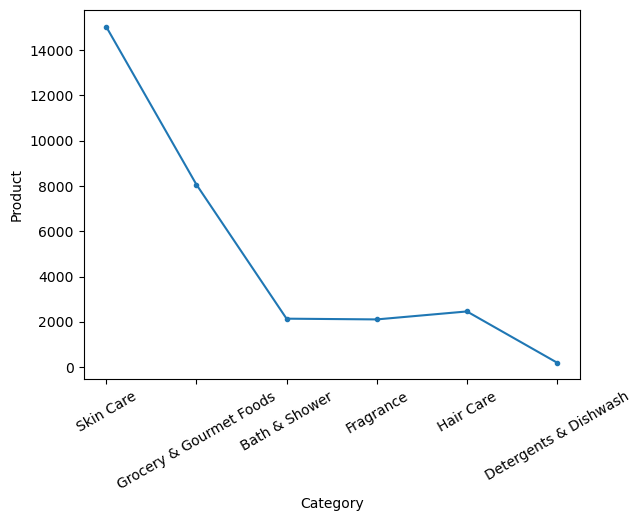

In [40]:
num_products_each_category.plot(kind=  'line',marker = '.',rot=30)
plt.xlabel('Category')
plt.ylabel('Product')

plt.show()

#### Comment
- From the results of the above two questions, we see that Indians are very interested in products in the category of skin care.

## 4. Reflection

Difficulties encountered:
- Learning library functions is a bit difficult.

Lesson learned:
- Know how to analyze an existing data.
- Know how to use the commands available in the python library.
- Know how to evaluate data through display parameters

## 5. References
- Materials provided by the instructor.